In [2]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from numpy import pi
from scipy.special import jv
import math
from pathlib import Path
import matplotlib.pyplot as plt
figsize_hams=(3.9,3.9)
fontsize = 9
PlotParams(fontsize=fontsize)

In [18]:
# tanh gradient
# N = 40
# alpha = 10
# d = 0.1
# nh = N/2
# ymin = jv(0, 3.8316)
# kn = np.zeros(N)
# for i in range(N):
#     kn[i] = alpha*math.tanh(d*(i- nh- 0.5))/4/d
# knmax = np.max(np.abs(kn))
# gradients = kn/knmax*ymin

# plt.plot(range(N), -gradients)
# plt.show()


### Get Ham from gradient

In [3]:
Ndiffs = 8
ymin = jv(0, 3.8316) 
print(ymin)
gradients = np.linspace(-ymin, ymin, Ndiffs) # for linear
#get A vals to get the right gradient
omega = 25
# print(gradients)
drive_style = "alternating"

xvals = ComputeAValsFromRequiredGradients(gradients)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
print(A_vals)

_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
                        2*pi/omega,
                        circle_boundary = 0
                        )

#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)

-0.40275939344110157
[-12.83046361  29.46284312 -17.78481717  34.45130448 -22.95627295
  40.00619815 -29.24459932  47.89493607 -47.89493607]


Ham is real


In [8]:
gradients[1]-gradients[0]

-0.11507411241174331

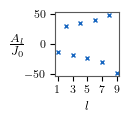

In [122]:

fig, ax = plt.subplots(figsize=(1.6/2.54,1.6/2.54))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
ax.set_ylabel(r"$\frac{A_l}{J_0}$", rotation=0, fontsize=12.5)
ax.yaxis.set_label_coords(-0.6,0.3
                          )

ax.set_xticks(np.arange(0,N,2))
ax.set_xlabel(r"$l$")
xticks = np.arange(0,N,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"a_vals_alternating_big.pdf", format="pdf", bbox_inches="tight")
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()

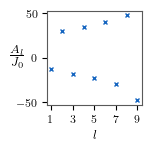

In [142]:

fig, ax = plt.subplots(figsize=(3.1/2.54,3.1/2.54))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
ax.set_ylabel(r"$\frac{A_l}{J_0}$", rotation=0, fontsize=12.5)
ax.yaxis.set_label_coords(-0.32,0.4)

ax.set_xticks(np.arange(0,N,2))
ax.set_xlabel(r"$l$")
xticks = np.arange(0,N,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"a_vals_alternating_big.pdf", format="pdf", bbox_inches="tight")
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()

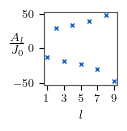

In [156]:

fig, ax = plt.subplots(figsize=(2.4/2.54,2.4/2.54))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
ax.set_ylabel(r"$\frac{A_l}{J_0}$", rotation=0, fontsize=12.5)
ax.yaxis.set_label_coords(-0.37,0.4)

ax.set_xticks(np.arange(0,N,2))
ax.set_xlabel(r"$l$")
xticks = np.arange(0,N,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"a_vals_alternating_medium.pdf", format="pdf", bbox_inches="tight")
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()

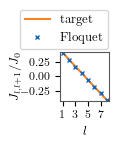

In [94]:

# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(1.6/2.54,1.6/2.54))
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
plt.plot(range(N-1), gradients, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target",
         c="#F78320")
ax.plot(range(N-1), y, 'x', label = r"Floquet", c="#1565C0", ms = 3)

ax.set_xlabel(r"$l$")
ax.set_ylabel(r"$J_{l, l+1}/J_0$", labelpad=-1.6)
ax.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 2
                                              ))
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating.pdf"
fig.savefig(save_dir, format="pdf", bbox_inches="tight")
plt.show()


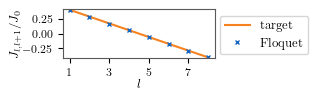

In [4]:

# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(5/2.54,1.6/2.54))
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
plt.plot(range(N-1), gradients, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target",
         c="#F78320")
ax.plot(range(N-1), y, 'x', label = r"Floquet", c="#1565C0", ms = 3)

ax.set_xlabel(r"$l$", labelpad = 1)
ax.set_ylabel(r"$J_{l, l+1}$/$J_0$", labelpad=0)
ax.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
plt.legend(loc="upper right", bbox_to_anchor=(1.65, 1
                                              ))
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating_long.pdf"
fig.savefig(save_dir, format="pdf", bbox_inches="tight")
plt.show()


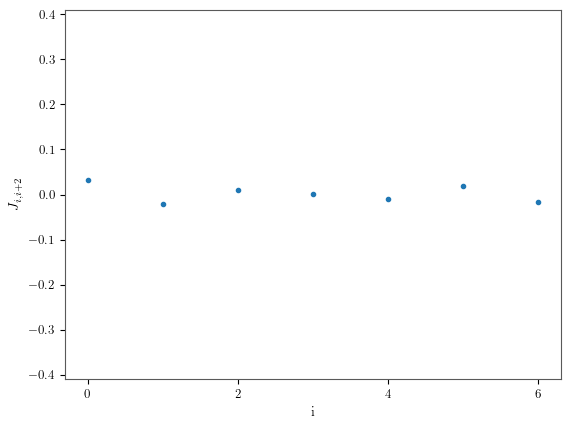

In [22]:

# plot gradient 2
y = [np.round(np.real(HF[i,i+2]), 3) for i in range(N-2)]
fig, ax = plt.subplots()
ax.plot(range(N-2), y, '.')
ax.set_ylabel(r"$J_{i, i+2}$")
ax.set_ylim([-0.41, 0.41])
ax.set_xlabel("i")
ax.set_xticks(np.arange(0,N-2,2))
plt.show()

-0.3964003 0.4021638


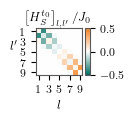

In [103]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac,xfrac}')
xticks = list(np.arange(0,N,2))
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham.pdf"
# PlotRealHamiltonian(HF, figsize=(4, 4), 
#                     colourbar_pad=0.07, colourbar_size_percentage=6.5, 
#                     # save_location = ham_plot_dir,
#                       axes_tick_pos=xticks, axes_tick_labels=[str(i+1) for i in xticks], 
#                     data_cmap_lims = (-0.5, 0.5), colourbar_cmap_lims=(-0.5,0.5), colourbar_ticks = np.arange(-0.5,0.6,0.5)
#                     )

figsize = (2.8,2.8)
data_cmap_lims = (-0.5, 0.5); colourbar_cmap_lims=(-0.5,0.5); colourbar_ticks = np.arange(-0.5,0.6,0.5)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
cm_unit = 1/2.54
fig, ax = plt.subplots(constrained_layout=True, 
                       figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /J_0$")
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax.set_xlabel('$l$')
ax.set_ylabel("$l'$", rotation=0, labelpad=5)
ax.set_xticks(xticks)
ax.set_yticks(xticks)

ax.set_xticklabels([str(i+1) for i in xticks])
ax.set_yticklabels([str(i+1) for i in xticks])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"10.5%", pad=0.03)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=cax, ticks = colourbar_ticks)
# 
fig.savefig(ham_plot_dir, format="pdf", bbox_inches="tight")

plt.show()


-0.3964003 0.4021638


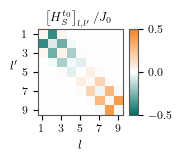

In [143]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac,xfrac}')
xticks = list(np.arange(0,N,2))
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham_big.pdf"
# PlotRealHamiltonian(HF, figsize=(4, 4), 
#                     colourbar_pad=0.07, colourbar_size_percentage=6.5, 
#                     # save_location = ham_plot_dir,
#                       axes_tick_pos=xticks, axes_tick_labels=[str(i+1) for i in xticks], 
#                     data_cmap_lims = (-0.5, 0.5), colourbar_cmap_lims=(-0.5,0.5), colourbar_ticks = np.arange(-0.5,0.6,0.5)
#                     )

figsize = (3.8,3.8)
data_cmap_lims = (-0.5, 0.5); colourbar_cmap_lims=(-0.5,0.5); colourbar_ticks = np.arange(-0.5,0.6,0.5)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
cm_unit = 1/2.54
fig, ax = plt.subplots(constrained_layout=True, 
                       figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /J_0$")
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax.set_xlabel('$l$')
ax.set_ylabel("$l'$", rotation=0, labelpad=6)
ax.set_xticks(xticks)
ax.set_yticks(xticks)

ax.set_xticklabels([str(i+1) for i in xticks])
ax.set_yticklabels([str(i+1) for i in xticks])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"10.5%", pad=0.06)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=cax, ticks = colourbar_ticks)
# 
fig.savefig(ham_plot_dir, format="pdf", bbox_inches="tight")

plt.show()


-0.3964003 0.4021638


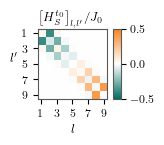

In [6]:
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac,xfrac}')
xticks = list(np.arange(0,N,2))
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham_medium.pdf"
# PlotRealHamiltonian(HF, figsize=(4, 4), 
#                     colourbar_pad=0.07, colourbar_size_percentage=6.5, 
#                     # save_location = ham_plot_dir,
#                       axes_tick_pos=xticks, axes_tick_labels=[str(i+1) for i in xticks], 
#                     data_cmap_lims = (-0.5, 0.5), colourbar_cmap_lims=(-0.5,0.5), colourbar_ticks = np.arange(-0.5,0.6,0.5)
#                     )

figsize = (3.4,3.4)
data_cmap_lims = (-0.5, 0.5); colourbar_cmap_lims=(-0.5,0.5); colourbar_ticks = np.arange(-0.5,0.6,0.5)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
cm_unit = 1/2.54
fig, ax = plt.subplots(constrained_layout=True, 
                       figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} $/$J_0$")
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax.set_xlabel('$l$')
ax.set_ylabel("$l'$", rotation=0, labelpad=6)
ax.set_xticks(xticks)
ax.set_yticks(xticks)

ax.set_xticklabels([str(i+1) for i in xticks])
ax.set_yticklabels([str(i+1) for i in xticks])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"10.5%", pad=0.06)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=cax, ticks = colourbar_ticks)
# 
fig.savefig(ham_plot_dir, format="pdf", bbox_inches="tight")

plt.show()


In [24]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*4/2.54, 4/2.54))
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)
# ax3.plot()

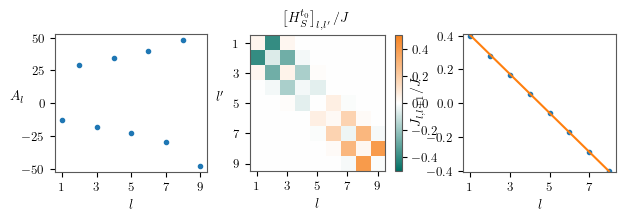

In [5]:
cm_unit = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True, 
                            figsize=(15.6*cm_unit, 5.2*cm_unit))
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, constrained_layout=True, 
#                             figsize=(12*cm_unit, 4*cm_unit))
ax1.plot(range(N), A_vals, '.')
ax1.set_ylabel(r"$A_l$", rotation=0)
ax1.set_xticks(np.arange(0,N,2))
ax1.set_xlabel(r"$l$")
xticks = np.arange(0,N,2)
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(i+1) for i in xticks])

colourbar_pad=0.07; colourbar_size_percentage=6.5, 
axes_tick_pos=xticks; axes_tick_labels=[str(i+1) for i in xticks];title_labelpad=10
data_cmap_lims = (-0.5, 0.5); colourbar_ticks = np.arange(-0.5,0.6,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
ax2.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax2.set_title( r'$ \left[H_{S}^{t_0}\right]_{i,j} /J$', pad=title_labelpad)
ax2.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax2.set_xlabel('$i$')
ax2.set_ylabel('$j$', rotation=0, labelpad=10)
ax2.set_xticks(axes_tick_pos)
ax2.set_yticks(axes_tick_pos)
ax2.set_xticklabels(axes_tick_labels)
ax2.set_yticklabels(axes_tick_labels)


ax2.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax2.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /J$", pad=title_labelpad)
ax2.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax2.set_xlabel('$l$')
ax2.set_ylabel("$l'$", rotation=0, labelpad=10)
ax2.set_xticks(axes_tick_pos)
ax2.set_yticks(axes_tick_pos)
ax2.set_xticklabels(axes_tick_labels)
ax2.set_yticklabels(axes_tick_labels)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size=f"5%", pad=0.1)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = np.arange(-1,1.2,0.2))
       


# divider = make_axes_locatable(ax2)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = colourbar_ticks)
    

y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
ax3.plot(range(N-1), y, '.', label = r"Floquet")
ax3.plot(range(N-1), gradients, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target"
         )
ax3.set_xlabel(r"$l$")
ax3.set_ylabel(r"$J_{l, l+1}/J$", rotation=90, labelpad=2)
ax3.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(i+1) for i in xticks])
# ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save_dir = Path().absolute().parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating.pdf"
# fig.savefig(save_dir, format="pdf", bbox_inches="tight")

save_dir = Path().absolute().parent.parent/"figures"/"black_hole_paper"/f"floquet_sequence_accumulative_omega={omega}_small.pdf"
# fig.savefig(save_dir, format="pdf", bbox_inches="tight")
plt.show()


In [29]:
print(A_vals/(A_vals[3]))

[-0.37242316  0.85520254 -0.51623059  1.         -0.66633973  1.16123899
 -0.84886769  1.39022126 -1.39022126]


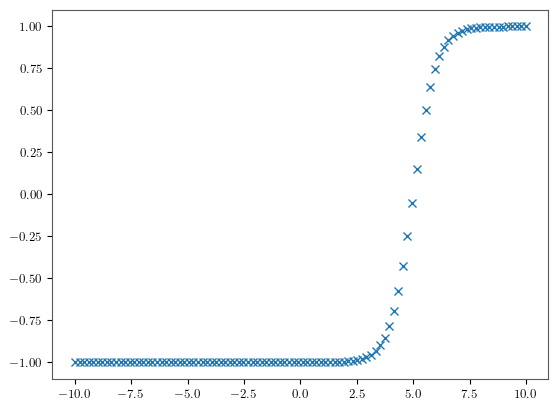

In [35]:
from numpy import tanh
j_list = np.linspace(-10, 10, 100)
jh = 5
d = 1
plt.plot(j_list, [tanh(d*(j-jh)) for j in j_list], 'x')
plt.show()